## Run these cells before running the actual colab notebook

(Uncomment and run these cells)

In [1]:
#!git clone https://github.com/ManavMNair/Quantum-image-encryption.git


In [2]:
#%cd Quantum-image-encryption

In [3]:


#!pip install -r requirements.txt

In [4]:
#!pip install pylatexenc

## Imports

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from quantum.neqr import encode_neqr, reconstruct_neqr_image
from quantum.scrambling import (
    quantum_scramble, quantum_permutation,
    reverse_quantum_scrambling, reverse_quantum_permutation
)
from chaos.qrng import qrng
from chaos.henon import henon_map
from chaos.hybrid_map import generate_chaotic_key_image
from dna.dna_encode import dna_encode
from dna.dna_decode import dna_decrypt
from utils.metrics import compute_psnr_ssim

## Configuration Parameters

In [6]:
IMAGE_PATH = "data/Te-gl_0017.png"
IMG_SIZE = 16
BLOCK_SIZE = 8
SHOTS = 65536
SEED_BITS = 16

## Load and display original image

Original Resolution: 512 x 512


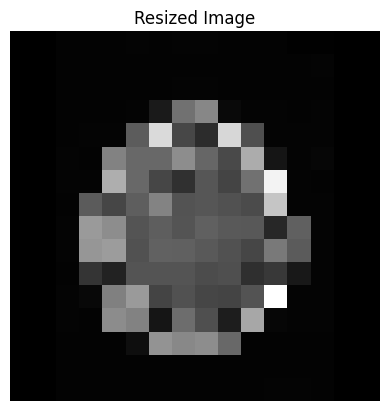

Image shape: (16, 16)


In [7]:
img = cv.imread(IMAGE_PATH, cv.IMREAD_GRAYSCALE)
height, width = img.shape[:2]
print(f"Original Resolution: {width} x {height}")

img = cv.resize(img, (IMG_SIZE, IMG_SIZE))
img = img.astype(np.uint8)

plt.imshow(img, cmap="gray")
plt.title("Resized Image")
plt.axis("off")
plt.show()

print("Image shape:", img.shape)


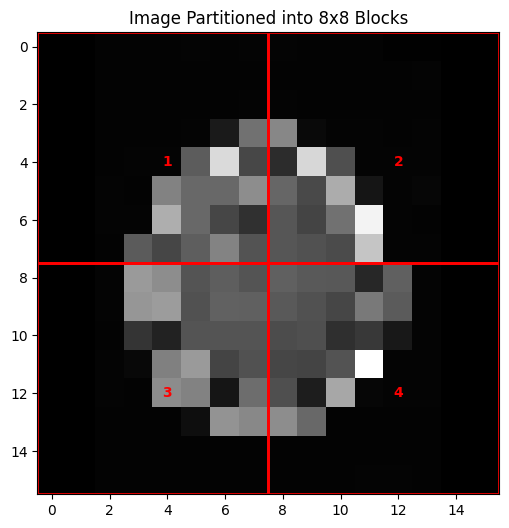

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img, cmap='gray')

# Draw the grid lines representing the slices
for y in range(0, IMG_SIZE, BLOCK_SIZE):
    for x in range(0, IMG_SIZE, BLOCK_SIZE):
        # Create a rectangle patch for each block
        rect = patches.Rectangle((x - 0.5, y - 0.5), BLOCK_SIZE, BLOCK_SIZE, 
                                 linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        
        # Optional: Label the blocks by their index (k)
        block_idx = (y // BLOCK_SIZE) * (IMG_SIZE // BLOCK_SIZE) + (x // BLOCK_SIZE) + 1
        ax.text(x + BLOCK_SIZE/2, y + BLOCK_SIZE/2, str(block_idx), 
                color='red', ha='center', va='center', fontweight='bold')

plt.title(f"Image Partitioned into {BLOCK_SIZE}x{BLOCK_SIZE} Blocks")
plt.axis('on')
plt.show()

In [9]:
# import matplotlib.pyplot as plt
# import numpy as np


# # Calculate number of blocks
# blocks_per_side = IMG_SIZE // BLOCK_SIZE
# total_blocks = blocks_per_side ** 2

# # Create a figure to hold all sub-images
# fig, axes = plt.subplots(blocks_per_side, blocks_per_side, figsize=(IMG_SIZE, IMG_SIZE))
# axes = axes.flatten() # Flatten to iterate easily if grid is 2D

# block_idx = 0
# for y in range(0, IMG_SIZE, BLOCK_SIZE):
#     for x in range(0, IMG_SIZE, BLOCK_SIZE):
#         # Slice the individual 8x8 block
#         block = img[y:y+BLOCK_SIZE, x:x+BLOCK_SIZE]
        
#         # Plot in the corresponding subplot
#         axes[block_idx].imshow(block, cmap='gray', vmin=0, vmax=255)
#         axes[block_idx].set_title(f"Block {block_idx + 1}\n(y:{y}, x:{x})")
#         axes[block_idx].axis('off')
        
#         block_idx += 1

# plt.tight_layout()
# plt.suptitle(f"Individual {BLOCK_SIZE}x{BLOCK_SIZE} Block Slices", fontsize=14, y=1.05)
# plt.show()

## Quantum-Chaotic key generation

In [ ]:
# Generate Global Chaotic Keys
x0 = qrng(SEED_BITS) / (2**SEED_BITS - 1)
y0 = qrng(SEED_BITS) / (2**SEED_BITS - 1)

# Generate keys for the total number of pixels to ensure enough unique values
x_seq, y_seq = henon_map(x0, y0, n_iter=IMG_SIZE * IMG_SIZE)
x_seq = np.nan_to_num(x_seq)
y_seq = np.nan_to_num(y_seq)

bpk_global = np.floor(x_seq * 256).astype(np.uint8)
ksk_global = np.floor(y_seq * 256).astype(np.uint8)

BPK_GLOBAL : [149 206   1  61  57 181  88 122 149   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  

c:\Users\MANEESH M NAIR\Desktop\DUK\S4\Project\Quantum Image Encryption\chaos\henon.py:10: RuntimeWarning: overflow encountered in scalar power
  x[i] = 1 - alpha * (x[i-1] ** 2) + y[i-1]
C:\Users\MANEESH M NAIR\AppData\Local\Temp\ipykernel_1536\3515992648.py:10: RuntimeWarning: overflow encountered in multiply
  bpk_global = np.floor(x_seq * 256).astype(np.uint8)
C:\Users\MANEESH M NAIR\AppData\Local\Temp\ipykernel_1536\3515992648.py:10: RuntimeWarning: invalid value encountered in cast
  bpk_global = np.floor(x_seq * 256).astype(np.uint8)
C:\Users\MANEESH M NAIR\AppData\Local\Temp\ipykernel_1536\3515992648.py:11: RuntimeWarning: overflow encountered in multiply
  ksk_global = np.floor(y_seq * 256).astype(np.uint8)
C:\Users\MANEESH M NAIR\AppData\Local\Temp\ipykernel_1536\3515992648.py:11: RuntimeWarning: invalid value encountered in cast
  ksk_global = np.floor(y_seq * 256).astype(np.uint8)


## NEQR Encoding

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Initialize containers for encryption "slides"
full_scrambled_img = np.zeros((IMG_SIZE, IMG_SIZE), dtype=np.uint8)
full_encrypted_img = np.zeros((IMG_SIZE, IMG_SIZE), dtype=np.uint8)
stored_kh_blocks = {}  # Store chaotic keys for decryption

num_position_qubits = int(2 * np.log2(BLOCK_SIZE))
block_idx = 0

print("[INFO] Starting Block-wise Encryption...")
count = 1
for y in range(0, IMG_SIZE, BLOCK_SIZE):
    for x in range(0, IMG_SIZE, BLOCK_SIZE):
        print(f"Encrypting block {count} out of {(IMG_SIZE// BLOCK_SIZE) ** 2}")

        # Slice unique key segments for this block
        current_bpk = bpk_global[block_idx : block_idx + BLOCK_SIZE]
        current_ksk = ksk_global[block_idx : block_idx + BLOCK_SIZE]
        
        # --- ENCRYPTION STAGE ---
        block = img[y:y+BLOCK_SIZE, x:x+BLOCK_SIZE]
        
        # Quantum Scrambling
        qc = encode_neqr(block)
        qc = quantum_scramble(qc, current_bpk, num_position_qubits)
        qc = quantum_permutation(qc, current_ksk, num_position_qubits)
        scrambled_block = reconstruct_neqr_image(qc, BLOCK_SIZE, BLOCK_SIZE, shots=SHOTS)
        full_scrambled_img[y:y+BLOCK_SIZE, x:x+BLOCK_SIZE] = scrambled_block
        
        # DNA Encryption
        dni0, dni1, dni2, dni3 = dna_encode(scrambled_block, current_ksk)
        KH_block = generate_chaotic_key_image(BLOCK_SIZE, BLOCK_SIZE)
        stored_kh_blocks[(y, x)] = KH_block  # Store the key for decryption
        dki0, dki1, dki2, dki3 = dna_encode(KH_block, current_ksk)
        
        # Combine into encrypted block
        encrypted_block = ((dni0 ^ dki0) << 6 | (dni1 ^ dki1) << 4 | 
                           (dni2 ^ dki2) << 2 | (dni3 ^ dki3)).astype(np.uint8)
        full_encrypted_img[y:y+BLOCK_SIZE, x:x+BLOCK_SIZE] = encrypted_block
        count += 1
        block_idx += BLOCK_SIZE

[INFO] Starting Block-wise Encryption...
Encrypting block 1 out of 4
Encrypting block 2 out of 4
Encrypting block 3 out of 4
Encrypting block 4 out of 4


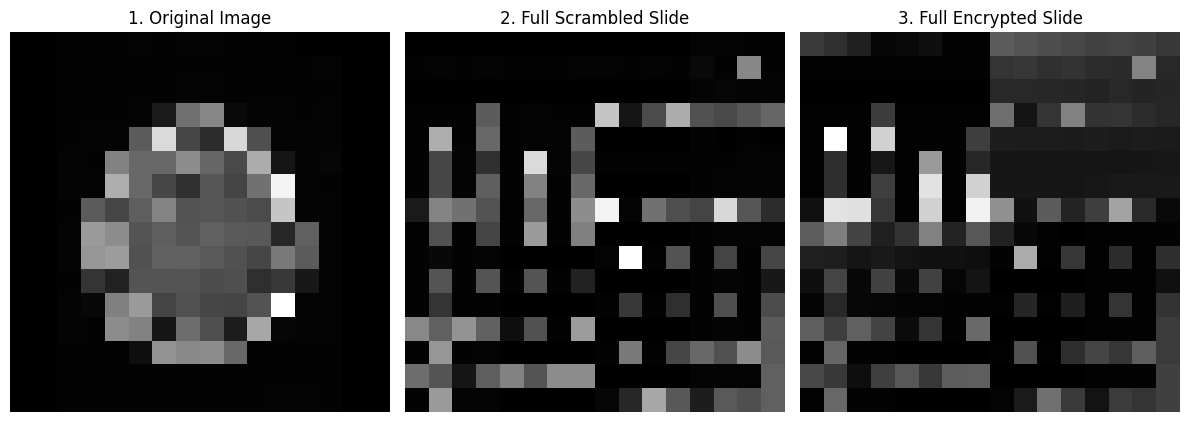

In [12]:

# --- PLOTTING ENCRYPTION STAGES ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("1. Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(full_scrambled_img, cmap='gray')
plt.title("2. Full Scrambled Slide")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(full_encrypted_img, cmap='gray')
plt.title("3. Full Encrypted Slide")
plt.axis('off')

plt.tight_layout()
plt.show()

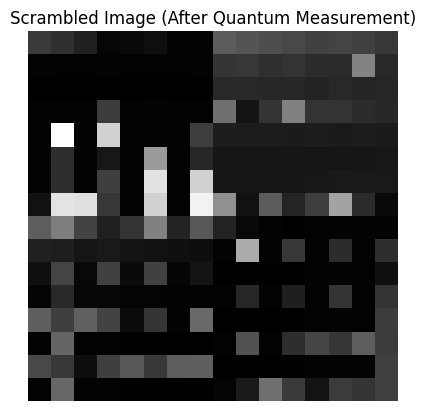

In [13]:
plt.imshow(full_encrypted_img, cmap="gray")
plt.title("Scrambled Image (After Quantum Measurement)")
plt.axis("off")
plt.show()

## Decryption and Reconstruction

In [14]:
# 1. Initialize containers for decryption "slides"
full_recovered_scrambled = np.zeros((IMG_SIZE, IMG_SIZE), dtype=np.uint8)
reconstructed_full_img = np.zeros((IMG_SIZE, IMG_SIZE), dtype=np.uint8)

block_idx = 0 # Reset to align with bpk_global and ksk_global

print("[INFO] Starting Block-wise Decryption...")
count = 1
for y in range(0, IMG_SIZE, BLOCK_SIZE):
    for x in range(0, IMG_SIZE, BLOCK_SIZE):
        print(f"Decrypting block {count} out of {(IMG_SIZE// BLOCK_SIZE) ** 2}")

        # Slice unique key segments used during encryption
        current_bpk = bpk_global[block_idx : block_idx + BLOCK_SIZE]
        current_ksk = ksk_global[block_idx : block_idx + BLOCK_SIZE]
        
        # Get the encrypted block from the previous stage
        enc_block = full_encrypted_img[y:y+BLOCK_SIZE, x:x+BLOCK_SIZE]
        
        # --- DECRYPTION STAGE ---
        # DNA Decryption (Recover Scrambled)
        KH_block = stored_kh_blocks[(y, x)]  # Retrieve stored key from encryption
        dki0, dki1, dki2, dki3 = dna_encode(KH_block, current_ksk)
        recovered_scrambled = dna_decrypt(enc_block, dki0, dki1, dki2, dki3, current_ksk)
        full_recovered_scrambled[y:y+BLOCK_SIZE, x:x+BLOCK_SIZE] = recovered_scrambled
        
        # Reverse Quantum Scrambling
        qc_re = encode_neqr(recovered_scrambled)
        qc_re = reverse_quantum_permutation(qc_re, current_ksk, num_position_qubits)
        qc_re = reverse_quantum_scrambling(qc_re, current_bpk, num_position_qubits)
        final_block = reconstruct_neqr_image(qc_re, BLOCK_SIZE, BLOCK_SIZE, shots=SHOTS)
        reconstructed_full_img[y:y+BLOCK_SIZE, x:x+BLOCK_SIZE] = final_block
        count += 1
        block_idx += BLOCK_SIZE

[INFO] Starting Block-wise Decryption...
Decrypting block 1 out of 4
Decrypting block 2 out of 4
Decrypting block 3 out of 4
Decrypting block 4 out of 4


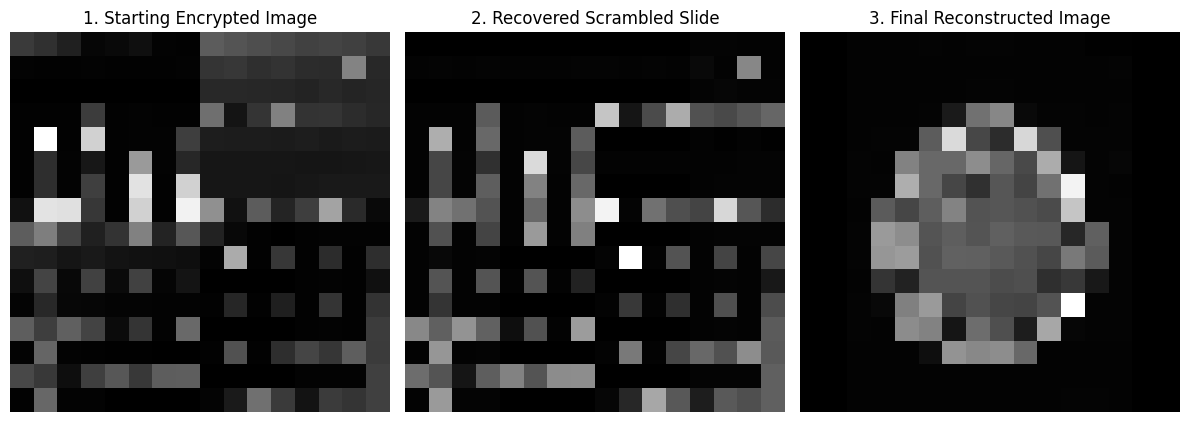


Final Block-wise Results -> PSNR: inf dB | SSIM: 1.0000


c:\Users\MANEESH M NAIR\Desktop\DUK\S4\Project\Quantum Image Encryption\.venv\lib\site-packages\skimage\metrics\simple_metrics.py:168: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range**2) / err)


In [15]:
# --- PLOTTING DECRYPTION STAGES ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(full_encrypted_img, cmap='gray')
plt.title("1. Starting Encrypted Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(full_recovered_scrambled, cmap='gray')
plt.title("2. Recovered Scrambled Slide")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(reconstructed_full_img, cmap='gray')
plt.title("3. Final Reconstructed Image")
plt.axis('off')

plt.tight_layout()
plt.show()

# Final Metrics
from utils.metrics import compute_psnr_ssim
psnr_val, ssim_val = compute_psnr_ssim(img, reconstructed_full_img)
print(f"\nFinal Block-wise Results -> PSNR: {psnr_val:.2f} dB | SSIM: {ssim_val:.4f}")

## Quantitative Evaluation (PSNR & SSIM)

In [16]:
psnr_val, ssim_val = compute_psnr_ssim(img, reconstructed_full_img)

print("Shots :", SHOTS)
print(f"PSNR  : {psnr_val:.2f} dB")
print(f"SSIM  : {ssim_val:.4f}")


Shots : 65536
PSNR  : inf dB
SSIM  : 1.0000


Original vs Reconstructed(decrypted)

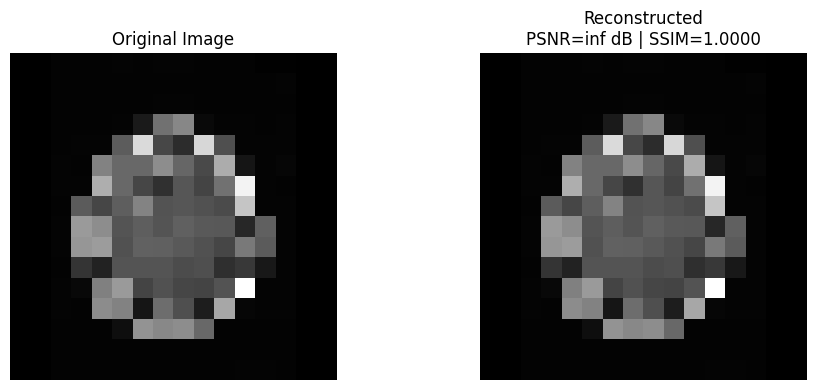

In [17]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(reconstructed_full_img, cmap="gray")
plt.title(f"Reconstructed\nPSNR={psnr_val:.2f} dB | SSIM={ssim_val:.4f}")
plt.axis("off")

plt.tight_layout()
plt.show()
